## Introduction

Understanding the behavior of reactions is crucial for designing efficient processes and optimizing industrial production. Two fundamental principles govern many aspects of chemical reactions: Dalton's Law and the Law of Mass Action.

#### Dalton's Law of Partial Pressure

Dalton's Law, formulated by John Dalton in the early 19th century, states that the total pressure exerted by a mixture of non-reacting gases is equal to the sum of the partial pressures of individual gases in the mixture. This law is fundamental in understanding the behavior of gas mixtures, as it allows us to determine the concentration of individual components in a gas mixture based on their partial pressures.

$P_{total} = P_1 + P_2 + P_3 + \ldots$

where:
- $ P_{total} $ is the total pressure of the gas mixture,
- $ P_1, P_2, P_3, \ldots $ are the partial pressures of the individual gases in the mixture.

In terms of mole fractions, Dalton's law can be written as:

$P_{total} = P \times x_1 + P \times x_2 + P \times x_3 + \ldots
$

where:
- $ P $ is the total pressure of the gas mixture,
- $ x_1, x_2, x_3, \ldots $ are the mole fractions of the individual gases in the mixture.

And if we want to express it in terms of concentrations, we can use the ideal gas law:

$
P_{total} = c_{total} \times RT$

where:
- $ c_{total} $ is the total concentration of the gas mixture,
- $ R $ is the gas constant,
- $ T $ is the temperature.


#### Law of Mass Action

The Law of Mass Action describes the relationship between the concentrations of reactants and the rate of a chemical reaction. It states that the rate of a chemical reaction is directly proportional to the product of the concentrations of the reactants, each raised to the power of their respective stoichiometric coefficients. This law provides a quantitative framework for understanding reaction kinetics and is instrumental in formulating rate equations for various chemical processes.

In a chemical reaction:

$ aA + bB \rightarrow cC + dD$

Mathematically:

$\text{Rate of reaction} = k \cdot [A]^a \cdot [B]^b$

where:
- $[A]$ and $[B]$ are the concentrations of reactants $A$ and $B$, respectively,
- $ k $ is the rate constant,
- $a$ and $b$ are the stoichiometric coefficients of reactants $A$ and $B$, respectively.

In this lab report, we explore the application of these fundamental principles in two scenarios: instantaneous reaction and slow reaction.

#### Instantaneous reaction

An instantaneous reaction is a type of chemical reaction that occurs almost instantaneously upon contact between reactants. In other words, the reaction proceeds very rapidly, often within milliseconds or even microseconds. This type of reaction typically occurs when the activation energy barrier for the reaction is low, allowing the reaction to proceed quickly once the reactants come into contact. Examples of instantaneous reactions include some combustion reactions and certain types of catalytic reactions.

#### Slow reaction 

A slow reaction is a type of chemical reaction that occurs over an extended period of time, often requiring minutes, hours, or even days to reach completion. These reactions proceed at a relatively slow rate due to high activation energy barriers or other factors that impede the progress of the reaction. Slow reactions are characterized by a gradual change in concentration of reactants and products over time. Examples of slow reactions include many organic reactions, certain precipitation reactions, and some biological processes such as enzyme-catalyzed reactions.

Through experimental data and theoretical analysis, we learn how these laws govern the behavior of chemical systems and influence reaction rates under different conditions.

## Objectives

- To analyze the concentration profile of a chemical species undergoing an instantaneous reaction.
- To investigate the influence of reaction rate constants on the progress of a slow chemical reaction.
- To demonstrate the application of fundamental laws in predicting reaction behavior and designing reaction processes.

## Methodology

1. Initialize the UnitRegistry from the pint library and import necessary modules.
2. Calculate the concentration (c) using given values of volume (V) and mass (m).
3. Determine the volume (V) using the given radius (r) for a spherical container.
4. Solve a differential equation representing the change in volume over time using odeint from scipy.integrate.
5. Plot the volume (V) as a function of time (t) to visualize its change over time.
6. Calculate the mass fractions of components A and B using their respective molecular weights and mole fractions.
7. Calculate the mole fraction of component A at two different points considering an instantaneous reaction.
8. For the instantaneous reaction (a), calculate the molar flux (NA) using Dalton's law and the provided formula.
9. For the slow reaction (b), define a function representing the equation for finding the root using fsolve.
10. Utilize fsolve to determine the solution to the equation numerically, considering units, and print the result.

## Results and Discussion

In the following section, we present the results obtained from our simulations and discuss their significance. These findings will provide insights into the behavior of the modeled systems and inform subsequent analyses.

### Calculation of Concentration

In [50]:
from pint import UnitRegistry

# Initialize UnitRegistry
ur = UnitRegistry()

# Given Values
V = 3.0 * ur.liters
m = 58.44 * ur.grams
mw = 58.44 * ur.grams / ur.mol  # defining molecular weight

# Calculating concentration
c = m / V

print(f"Concentration : {c}")

Concentration : 19.48 gram / liter


The output presents the calculated concentration of a substance, derived from the provided volume and mass values using the formula $ c = \frac{m}{V} $. The concentration is displayed with its corresponding units, providing a comprehensive representation of the calculated value.

### Calculation of volume of sphere

In [48]:
from pint import UnitRegistry
import numpy as np

# Given values
r=10 * ur.cm

# Volume Calculation
V=(4/3)*np.pi*r**3
print(f"Volume : {V}")

Volume : 4188.790204786391 centimeter ** 3


The output represents the calculated volume of a sphere based on the given radius value. Utilizing the formula for volume calculation, the result is presented as the volume in cubic centimeters.

### Volume Dynamics Simulation with Differential Equation

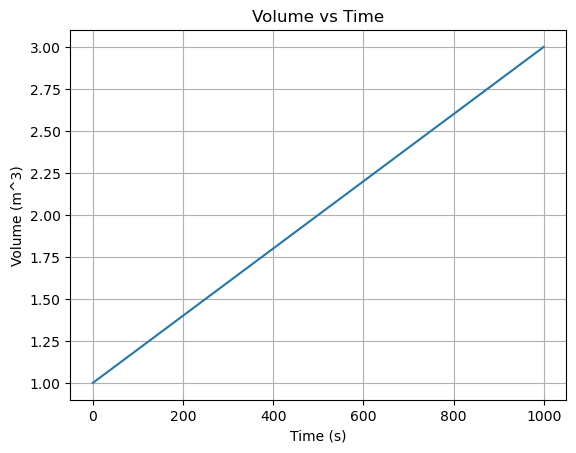

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function representing the differential equation
def dV_dt(V, t, m1, m2, density):
    return (1/density) * (m1 - m2)

# Define the parameters
m1 = 4  # kg/s
m2 = 2  # kg/s
density = 1000  # kg/m^3

# Define the initial condition
V_initial = 1  # m^3

# Time points for integration
t = np.linspace(0, 1000, 1000)  # integrate till 1000s

# Solve the differential equation
V = odeint(dV_dt, V_initial, t, args=(m1, m2, density))

# Plot the result
plt.plot(t, V)
plt.xlabel('Time (s)')
plt.ylabel('Volume (m^3)')
plt.title('Volume vs Time')
plt.grid(True)
plt.show()


The output illustrates the dynamic change in volume over time as governed by the provided differential equation and parameters. The plot demonstrates how the volume evolves from an initial value of 1 cubic meter under the influence of the specified inflow and outflow rates (m1 and m2) and the density of the system. The volume gradually increases or decreases depending on the balance between the inflow and outflow rates, showcasing the system's response to the given parameters over the specified time interval. The visualization offers valuable insights into the behavior of the system and its volume dynamics over time.

### Mass Fraction Calculation of Components A and B

In [5]:
# Given values
mwA = 78.11  
mwB = 92.14
xa = 0.4
xb=0.6

# Calculating the mass fraction
massfractionA = (xa * mwA) / ((xa * mwA) + (xb * mwB))
massfractionB = (xb * mwB) / ((xa * mwA) + (xb * mwB))

# Displaying results
print("Mass fraction of component A:", massfractionA)
print("Mass fraction of component B:", massfractionB)

Mass fraction of component A: 0.36108542899408286
Mass fraction of component B: 0.6389145710059172


The output presents the calculated mass fractions of components A and B in a mixture. These fractions indicate the proportion of each component in the mixture based on their respective molecular weights and mole fractions. This information is crucial for understanding the composition of the mixture and its properties. The calculated mass fractions provide valuable insights into the relative abundance of components A and B, aiding in various analytical and engineering applications.

### Mole Fraction Calculation for Component A

In [57]:
import numpy as np

# Given data
P = 101.32 * 1000  # Pa
T = 300  # K
Dab = 0.15e-4  # m^2/s
d = 2e-3  # m
P_A1 = 101.32  # kPa
R= 8.314

# Convert partial pressure of A at point 1 to Pa
P_A1 = P_A1 * 1000  # convert to Pa

# Calculate mole fraction of A at point 1
x_A1 = P_A1 / P
print(f"Concentration of A at point 1 : {x_A1}")

# Calculate mole fraction of A at point 2 for instantaneous rate of reaction
x_A2 = x_A1 * (1 - (2e-3 / d))  # distance converted to meters
print(f"Concentration of A at point 2 : {x_A2}")
c=P/(R*T)


Concentration of A at point 1 : 1.0
Concentration of A at point 2 : 0.0


The output displays the calculated mole fractions of component A at two different points: point 1 and point 2. At point 1, the mole fraction of A is determined based on the given partial pressure, while at point 2, it is calculated considering an instantaneous reaction occurring at a specified distance. These mole fractions provide insights into the distribution of component A in the system under different conditions, aiding in the analysis of reaction kinetics and transport phenomena.

### Diffusion and Chemical Reaction at a Boundary

Pure gas A diffuses from point 1 at a partial pressure of 101.32 kPa to a point 2 a distance 2 mm away. At point 2, it undergoes a chemical reaction at the catalyst surface where $ A \rightarrow 2B $. Component B diffuses back at steady state. The total pressure is $ P = 101.32 $ kPa. The temperature is 300 K and $ D_{ab} = 0.15 \times 10^{-4} $ $m^2$/s.

a. For instantaneous rate of reaction, calculate $ x_{a2} $ and $ N_a $.

b. For a slow reaction where $ k' = 5.63 \times 10^{-3} $ m/s, calculate $ x_{a2} $ and $ N_a $.

$$
\begin{align*}
A \rightarrow 2B \\
N_a &= -c \cdot D_{\text{ab}} \cdot \frac{d x_a}{dz} + x_a \cdot (N_a + N_b) \\
N_b &= -2N_a \\
\end{align*}
$$
Rearranging and integrating with constant c $(P=\text{constant})$ we obtain the following:


a. Solution
    for Instantaneous surface reaction
$$
\begin{align*}
\int_{z_1=0}^{z_2=\delta} N_a \, dz &= -c \cdot D_{\text{ab}} \int_{x_{a1}}^{x_{a2}} \frac{d x_a}{1 + x_a} \\
N_a &= \frac{c \cdot D_{\text{ab}}}{\delta} \ln\left(\frac{1+x_{a1}}{1+x_{a2}}\right)
\end{align*}
$$

In [8]:
import numpy as np
import math
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from pint import UnitRegistry
ur=UnitRegistry()

#a. instantaneous reaction 
xa1=1 #Dalton's law (pi=x1*P) also because it is pure A 
xa2=0 # because at point 2, the gas A is reacted instantaneously with the help of catalyst
delta=2.00 *ur.mm
del1=delta.to(ur.m)
Dab=0.15*10**(-4)*(ur.m**2/ur.s)
P=101.32*10**3*ur.pascal
T=300*ur.degK
R=8.314*(ur.m**3*ur.pascal)/(ur.mol*ur.degK)
c=P/(R*T)
print(c)
i=math.log((1+xa1)/(1+xa2))
Na=((c*Dab)/del1)*i
print (Na)

40.62224360516398 mole / meter ** 3
0.21117895217204008 mole / meter ** 2 / second


The output of part a reveals the calculated molar flux $N_a$ of component A in the instantaneous surface reaction scenario. This flux quantifies the rate of mass transfer of component A across the boundary due to diffusion and chemical reaction. The calculated value of $N_a$ provides crucial information about the dynamics of the reaction process and the transport of species at the boundary. Additionally, it helps in understanding the influence of reaction kinetics and diffusion coefficients on the overall mass transfer behavior in the system.

b. Solution for Slow surface reaction
    $$N_a = \frac{{c \cdot D_{\text{ab}}}}{{\delta}} \cdot \ln\left(\frac{{1 + x_{a1}}}{{1 + \frac{{N_a}}{{k1 \cdot c}}}}\right)$$

In [42]:
import numpy as np
from scipy.optimize import fsolve
from pint import UnitRegistry

ur = UnitRegistry()

# b. Slow reaction
# Given data with units
xa1 = 1  # Dalton's law (pi=x1*P) also because it is pure A
delta = 2.00 * ur.mm
del1 = delta.to(ur.meter)  # Convert delta to meters
Dab = 0.15e-4 * ur.meter ** 2 / ur.second
P = 101.32e3 * ur.pascal
T = 300 * ur.kelvin
R = 8.314 * ur.meter ** 3 * ur.pascal / ur.mol / ur.kelvin
c = P / (R * T)
k1 = 5.63e-3 * (ur.meter / ur.second)

# Define the function
def equation(x):
    return x - ((c * Dab) / del1) * np.log((1 + xa1) / (1 + x / (k1 * c)))

# Without unit
def equation_numeric(x_numeric):
    x = x_numeric * ur.mole / ur.meter ** 2 / ur.second  # Add units
    result = equation(x).to_base_units().magnitude  # Convert to base units (SI) and extract numeric value
    return result

# fsolve to find the root
solution_numeric = fsolve(equation_numeric,0)[0]# fsolve returns a list, we extract the first element
solution = solution_numeric * ur.mole / ur.meter ** 2 / ur.second  # Convert to original units
print(solution)


0.10034631114033263 mole / meter ** 2 / second


The output of part b provides the solution for the molar flux $N_a$ of component A in the scenario of a slow reaction at the boundary. This flux signifies the rate of mass transfer of component A under conditions where the reaction kinetics are slower compared to the instantaneous reaction case. The calculated value of $N_a$ offers insights into the mass transport behavior and the influence of reaction kinetics on the overall mass transfer rate. Additionally, it helps in understanding how the reaction rate constant 
$k1$ affects the flux of component A across the boundary.

## Conclusion


In conclusion, the experiments conducted fundamental principles governing chemical reactions, including Dalton's Law and the Law of Mass Action, which were essential for understanding reaction kinetics and mass transfer phenomena. Through careful analysis and calculations, we explored scenarios of instantaneous and slow reactions, providing valuable insights into the dynamics of chemical processes at boundaries and their implications for practical applications. These findings underscore the importance of considering reaction kinetics and diffusion dynamics in designing efficient processes and optimizing industrial production.